<a href="https://colab.research.google.com/github/kilianodonell-cmd/Crop-_Statistics-/blob/main/notebooks/01_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 01 – Data loading

Purpose:
- load raw data
- initial inspection
- basic cleaning



In [2]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [3]:


from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
df_1 = pd.read_csv("../content/drive/MyDrive/Data_Mastery/data/gaza_fieldwork_crop_covers.csv")

df_1.head()

,id,formid,plotid,enumerator_id,gid,report_close_time,total_crop_cover,crop_po,crop_cover_percentage
0,820,20,9624988,1,18418,2025-04-10 12:06:32.653,80,feijões,30
1,820,20,9624988,1,18418,2025-04-10 12:06:32.653,80,milho,50
2,821,20,12364565,2,9045,2025-04-10 12:06:45.057,100,trigo,100
3,821,20,12364565,2,9058,2025-04-10 12:06:45.057,100,batata doce de polpa alaranjada,100
4,821,20,12364565,2,9065,2025-04-10 12:06:45.057,100,feijões,100


In [5]:
gdf_sam = gpd.read_file("../content/drive/MyDrive/Data_Mastery/data/shapefiles/moz_sampling_areas.shp")

gdf_sam.head()

,plotid,optional,prov,stratum,fcname,geometry
0,10084432.0,0,Gaza,scarce alluvial,scarce,"POLYGON ((503500 7216000, 503500 7216500, 5040..."
1,12014580.0,1,Gaza,scarce alluvial,scarce,"POLYGON ((600000 7290000, 600000 7290500, 6005..."
2,10264592.0,0,Gaza,scarce alluvial,scarce,"POLYGON ((512500 7296000, 512500 7296500, 5130..."
3,7015055.0,0,Gaza,scarce alluvial,scarce,"POLYGON ((350000 7527500, 350000 7528000, 3505..."
4,9884543.0,0,Gaza,scarce alluvial,scarce,"POLYGON ((493500 7271500, 493500 7272000, 4940..."


In [6]:
missing_plotids = sorted(
    set(df_1["plotid"].unique())
    - set(gdf_sam["plotid"].unique())
)

missing_plotids


[]

In [7]:
missing_plotids = sorted(
  set(gdf_sam["plotid"].unique())
   - set(df_1["plotid"].unique())

)

missing_plotids


[np.float64(6975045.0),
 np.float64(6994897.0),
 np.float64(7015055.0),
 np.float64(7035055.0),
 np.float64(7155097.0),
 np.float64(7275020.0),
 np.float64(7494842.0),
 np.float64(7744825.0),
 np.float64(7784866.0),
 np.float64(7874793.0),
 np.float64(7894767.0),
 np.float64(7954783.0),
 np.float64(8144868.0),
 np.float64(8164864.0),
 np.float64(8205137.0),
 np.float64(8234973.0),
 np.float64(8334712.0),
 np.float64(8354714.0),
 np.float64(8504703.0),
 np.float64(8514772.0),
 np.float64(8734827.0),
 np.float64(8744647.0),
 np.float64(8954774.0),
 np.float64(8985043.0),
 np.float64(9024738.0),
 np.float64(9134725.0),
 np.float64(9185144.0),
 np.float64(9495244.0),
 np.float64(9534651.0),
 np.float64(9555059.0),
 np.float64(9715241.0),
 np.float64(9754786.0),
 np.float64(9864553.0),
 np.float64(9864618.0),
 np.float64(9884543.0),
 np.float64(9904539.0),
 np.float64(10004537.0),
 np.float64(10084432.0),
 np.float64(10264438.0),
 np.float64(10264592.0),
 np.float64(10274416.0),
 np.float64

In [8]:
print(gdf_sam.columns)

Index(['plotid', 'optional', 'prov', 'stratum', 'fcname', 'geometry'], dtype='object')


In [9]:
print(gdf_sam["fcname"].unique())

['scarce' 'regular' 'irrigated']


In [10]:
print(gdf_sam["optional"].unique())

[0 1 2]


In [11]:
gdf_seg = gpd.read_file("../content/drive/MyDrive/Data_Mastery/data/shapefiles/moz_segments.shp")

gdf_seg.head()

,gid,id,plotid,landform_e,landform_p,farming_ty,farming__1,profile,optional,cuo_class_,cuo_clas_1,segment_cl,segment__1,code,tasked,district,areasize_w,geometry
0,24063,23663,10714495,pediplain,pediplano,regular,regular,10 early pedi,1,uncultivated,terra no cultivada,open woodland,floresta aberta,205,NaN,Bilene,0.0,"POLYGON ((534750 7248011.259, 534750 7248250.0..."
1,24017,23625,10714495,pediplain,pediplano,regular,regular,10 early pedi,1,cultivated,terra cultivada,agricultural field,campo agrícola,301,NaN,Bilene,0.0,"POLYGON ((535235.705 7247274.049, 535236.34 72..."
2,24016,23624,10714495,pediplain,pediplano,regular,regular,10 early pedi,1,cultivated,terra cultivada,agricultural field,campo agrícola,301,NaN,Bilene,0.0,"POLYGON ((535452.472 7248230.195, 535463.051 7..."
3,24011,23621,10714495,pediplain,pediplano,regular,regular,10 early pedi,1,uncultivated,terra no cultivada,other,outro,208,NaN,Bilene,0.0,"POLYGON ((535692.434 7247897.073, 535710.954 7..."
4,24009,23619,10714495,pediplain,pediplano,regular,regular,10 early pedi,1,uncultivated,terra no cultivada,other,outro,208,NaN,Bilene,0.0,"POLYGON ((535596.353 7248121.187, 535590.474 7..."


In [12]:
missing_plotids = sorted(
    set(df_1["plotid"].unique())
    - set(gdf_seg["plotid"].unique())
)

missing_plotids


[]

In [13]:
missing_plotids = sorted(
    set(gdf_seg["plotid"].unique())
    - set(df_1["plotid"].unique())
)

len(missing_plotids)


103

In [14]:
print(gdf_seg.columns)

Index(['gid', 'id', 'plotid', 'landform_e', 'landform_p', 'farming_ty',
       'farming__1', 'profile', 'optional', 'cuo_class_', 'cuo_clas_1',
       'segment_cl', 'segment__1', 'code', 'tasked', 'district', 'areasize_w',
       'geometry'],
      dtype='object')


In [15]:
gdf_seg["district"].unique()

array(['Bilene', 'Xai-Xai', 'Mandlakaze', 'Chibuto', 'Chokwe',
       'Chicualacuala_Black', 'Guija', 'Massingir', 'Mabalane', 'Chigubo',
       'Chicualacuala', 'Massangena', 'Cidade de Xai-Xai'], dtype=object)

In [16]:
for col in gdf_seg.columns:
    print(col)
    print(gdf_seg[col].unique())
    print("------")


gid
[24063 24017 24016 ... 18082 18031 18088]
------
id
[23663 23625 23624 ... 17729 17731 17736]
------
plotid
[10714495 10474489 10944477 12034499 12194524 11614572 10294521 10294468
 12734545 11004454 11104448  7644979 10824574 10784529 11164473  8234973
 10734673  9534651  8514772  9024738 10244478  8734827 11184541  9504638
 10084432 10694677 10884738 10484564 10784479 11034460 11034521  9884543
  9864618 11514703  9754786 10624485  9594616 11784584 10354511  8744647
  8205137 10274416  8164864 11074511 10734683  9185144 10314505 10154468
  6994897 10734525 10204588 10894432  9715241  6975045 11054454 11184525
 11384487  8634655 11774475 10264438  7744825 10764446  7275020  9134725
 11434481 12014580  7035055 11114719  9624988 10325175  8354714 11024497
 10244521  8504703 11944595 10564416 11104444 10974726 11774738 11794734
 11444651  7894767 10374458 12034495 11074550  9495244 11094515  7015055
 10684677 10314574  9555059 10584515 10294501 10624511 11324527 10624422
  7784866  8

In [17]:
gdf_stra = gpd.read_file("../content/drive/MyDrive/Data_Mastery/data/shapefiles/moz_strata.shp")

gdf_stra.head()

,id,province_i,province,cluster,stratum,fcname,landform,geometry
0,41,2,Gaza,q03a,5 late pedi,regular,pediplain,"MULTIPOLYGON (((521420.02 7201748.95, 521372.0..."
1,42,2,Gaza,q03b,8 late pedi,regular,pediplain,"MULTIPOLYGON (((521429.52 7202601.43, 521564.2..."
2,44,2,Gaza,q03c,11 late pedi,regular,pediplain,"MULTIPOLYGON (((525552.176 7211794.603, 525634..."
3,45,2,Gaza,q19,12 late pedi,regular,pediplain,"MULTIPOLYGON (((524569.02 7212062.67, 524569.0..."
4,54,2,Gaza,q16a,7 early pedi,regular,pediplain,"MULTIPOLYGON (((507665.229 7247408.124, 506763..."


In [18]:
gdf_stra["id"].nunique()

37

In [19]:
gdf_stra[gdf_stra["province"] == "Gaza"]["stratum"].nunique()

27

In [20]:
print(gdf_seg.geom_type.unique())


['Polygon']


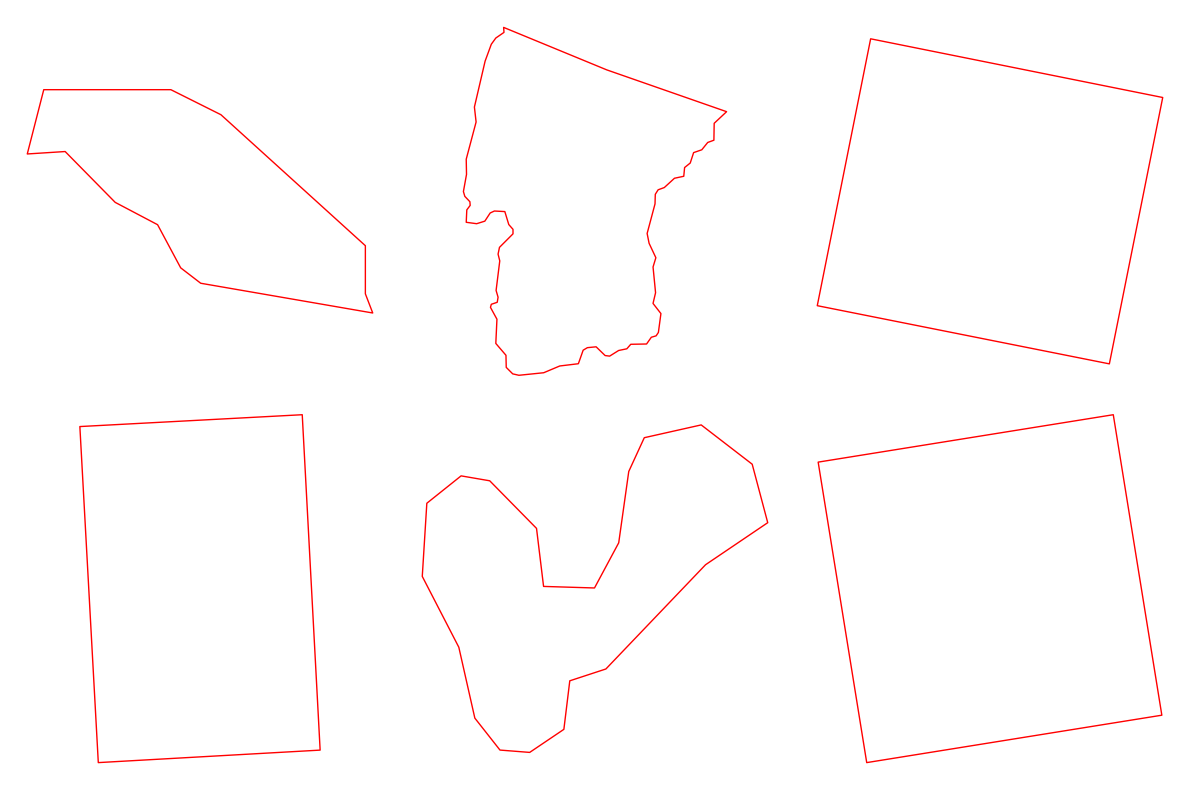

In [21]:
# sample 6 random polygons
sampled = gdf_seg.sample(6)

fig, axes = plt.subplots(2, 3, figsize=(12, 8))

for ax, (_, row) in zip(axes.flatten(), sampled.iterrows()):
    gdf_seg.iloc[[row.name]].plot(
        ax=ax,
        facecolor="none",
        edgecolor="red"
    )
    ax.set_axis_off()

plt.tight_layout()
plt.show()


In [22]:
gdf_seg[gdf_seg["plotid"].isin(gdf_sam["plotid"])].groupby("plotid").size()


,0
plotid,
6975045,2
6994897,3
7015055,132
7035055,16
7155097,241
...,...
12194485,942
12194524,96
12204477,154


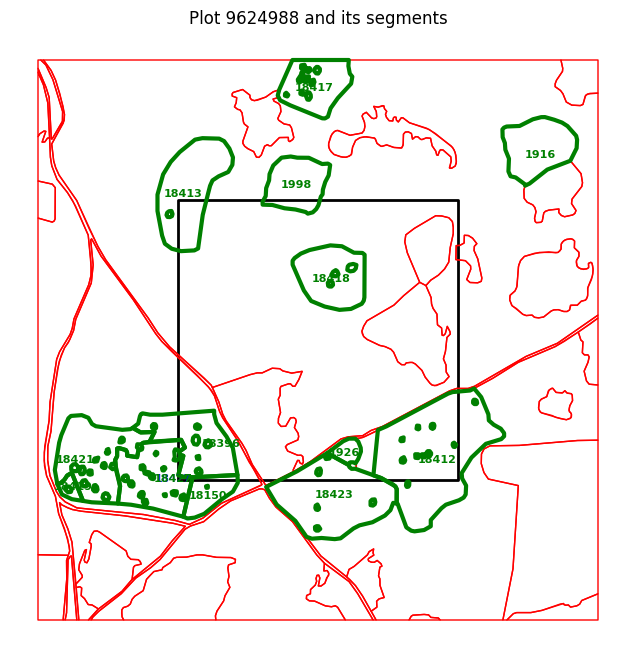

[18427, 18423, 18421, 18418, 18417, 18410, 18409, 18412, 18413, 18406, 18407, 18396, 18419, 1900, 2008, 1957, 1956, 1923, 1922, 1731, 2003, 2002, 2001, 2000, 1999, 1998, 2006, 2005, 2004, 1996, 1995, 1994, 1993, 1992, 1991, 1990, 1989, 1988, 1986, 1985, 1984, 1983, 1982, 1981, 1980, 1979, 1978, 1977, 1976, 1975, 1974, 1973, 1972, 1971, 1970, 1969, 1967, 1966, 1965, 1963, 1962, 1961, 1960, 1959, 1958, 1951, 1950, 1949, 1948, 1947, 1946, 1945, 1944, 1942, 1941, 1940, 1987, 1954, 1953, 1939, 1938, 1937, 1936, 1952, 1932, 1931, 1930, 1929, 1928, 1964, 1935, 1934, 1933, 1926, 1943, 1925, 1924, 1916, 1894, 1955, 1917, 1890, 1906, 1868, 1851, 2007, 18150]


In [23]:
#lot_id = gdf_sam["plotid"].iloc[1]
plot_id= 9624988
sam_plot = gdf_sam[gdf_sam["plotid"] == plot_id]
seg_plot = gdf_seg[gdf_seg["plotid"] == plot_id]


fig, ax = plt.subplots(figsize=(8, 8))

# plot main plot polygon
sam_plot.plot(
    ax=ax,
    facecolor="none",
    edgecolor="black",
    linewidth=2,
    label="Plot"
)

# plot segments inside
seg_plot.plot(
    ax=ax,
    facecolor="none",
    edgecolor="red",
    linewidth=1,
    label="Segments"
)

# add segment label
for _, row in seg_plot[seg_plot["gid"] == 18427].iterrows():
    x, y = row.geometry.representative_point().coords[0]
    ax.text(
        x, y,
        str(row["gid"]),
        fontsize=8,
        color="blue",
        ha="center",
        va="center"
    )

highlight_gid = [18427, 18423, 18421, 18418, 18417, 18412, 18413, 18396, 18419, 1998, 1926, 1916, 18150]

# Plot highlighted segment boundaries in green
seg_plot[seg_plot["gid"].isin(highlight_gid)].plot(
    ax=ax,
    facecolor="none",
    edgecolor="green",
    linewidth=3,
    label="Highlighted segments"
)

# Add gid labels for highlighted segments
for _, row in seg_plot[seg_plot["gid"].isin(highlight_gid)].iterrows():
    x, y = row.geometry.representative_point().coords[0]
    ax.text(
        x, y,
        str(row["gid"]),
        fontsize=8,
        color="green",
        ha="center",
        va="center",
        fontweight="bold"
    )



ax.set_title(f"Plot {plot_id} and its segments")
ax.set_axis_off()

plt.show()

gid_list = seg_plot["gid"].tolist()
print(gid_list)


In [24]:
## what?
gdf_gz = gdf_seg[gdf_seg["gid"].isin(df_1["gid"])].copy()
print("segments_ids:", gdf_gz["gid"].nunique())
print("sampling area_ids:", gdf_gz["plotid"].nunique())


segments_ids: 1071
sampling area_ids: 46


In [25]:
gdf_gz.head()

,gid,id,plotid,landform_e,landform_p,farming_ty,farming__1,profile,optional,cuo_class_,cuo_clas_1,segment_cl,segment__1,code,tasked,district,areasize_w,geometry
596,18178,17823,10944477,pediplain,pediplano,regular,regular,10 early pedi,0,cultivated,terra cultivada,agricultural field,campo agrícola,301,3.0,Xai-Xai,152.986671,"POLYGON ((546509.027 7238486.318, 546514.338 7..."
603,18170,17816,10944477,pediplain,pediplano,regular,regular,10 early pedi,0,uncultivated,terra no cultivada,open woodland,floresta aberta,205,2.0,Xai-Xai,8922.510025,"POLYGON ((546884.485 7238949.864, 546889.606 7..."
608,18161,17813,10944477,pediplain,pediplano,regular,regular,10 early pedi,0,cultivated,terra cultivada,agricultural field,campo agrícola,301,3.0,Xai-Xai,4960.516669,"POLYGON ((546773.043 7238759.732, 546779.161 7..."
638,618,297,10944477,pediplain,pediplano,regular,regular,10 early pedi,0,cultivated,terra cultivada,agricultural field,campo agrícola,301,2.0,Xai-Xai,1.368582,"POLYGON ((546977.894 7238448.186, 546982.364 7..."
666,544,228,10944477,pediplain,pediplano,regular,regular,10 early pedi,0,cultivated,terra cultivada,agricultural field,campo agrícola,301,3.0,Xai-Xai,862.446178,"POLYGON ((546890.909 7238729.339, 546901.175 7..."


In [26]:
relations = pd.DataFrame({
    "rows": [
        len(gdf_gz),
        gdf_gz["plotid"].nunique(),
        gdf_gz["id"].nunique(),
        gdf_gz["gid"].nunique()
    ]
}, index=[
    "total rows",
    "unique plotid",
    "unique id",
    "unique gid"
])

print(relations)


               rows
total rows     1071
unique plotid    46
unique id      1071
unique gid     1071


In [27]:
relations_df1 = pd.DataFrame({
    "rows": [
        len(df_1),
        df_1["plotid"].nunique(),
        df_1["id"].nunique(),
        df_1["gid"].nunique()
    ]
}, index=[
    "total rows",
    "unique plotid",
    "unique id",
    "unique gid"
])

print(relations_df1)


               rows
total rows     1837
unique plotid    46
unique id       127
unique gid     1071


In [28]:
gdf_gz["profile"].nunique()

22

In [29]:
all_profiles = set(gdf_seg["profile"].unique())
gdf_profiles = set(gdf_gz["profile"].unique())

#sorted(all_profiles - visited_profiles)


In [30]:
missing_gids = gdf_seg.loc[
    ~gdf_seg["gid"].isin(df_1["gid"]),
    "gid"
].unique()

missing_gids


array([24063, 24017, 24016, ..., 18082, 18031, 18088])

In [31]:
gdf_seg.loc[
    gdf_seg["gid"].isin(missing_gids),
    ["gid", "plotid", "profile"]
].sort_values(["profile", "plotid"])


,gid,plotid,profile
31961,14592,10134470,10 early pedi
31962,14584,10134470,10 early pedi
31963,20498,10134470,10 early pedi
31964,20491,10134470,10 early pedi
31965,20490,10134470,10 early pedi
...,...,...,...
4796,30868,8514772,scarce western pedi
4797,30877,8514772,scarce western pedi
4798,30876,8514772,scarce western pedi
4799,30871,8514772,scarce western pedi


In [32]:
# for checking whether gdf_gz contains all segments or only visited & cultivated ones
segments_per_sa = (
    gdf_gz
    .groupby("plotid", as_index=False)["gid"]
    .nunique()
    .rename(columns={"gid": "n_segments"})
)

#print(segments_per_sa)

segments_check = (
    gdf_seg
    .groupby("plotid", as_index=False)["gid"]
    .nunique()
    .rename(columns={"gid":"segments_all"})
)

#print(segments_check)

In [33]:
gdf_seg["district"].unique()

array(['Bilene', 'Xai-Xai', 'Mandlakaze', 'Chibuto', 'Chokwe',
       'Chicualacuala_Black', 'Guija', 'Massingir', 'Mabalane', 'Chigubo',
       'Chicualacuala', 'Massangena', 'Cidade de Xai-Xai'], dtype=object)

In [34]:
gdf_gz["district"].nunique()

10

In [35]:
gdf_districts = gpd.read_file("../content/drive/MyDrive/Data_Mastery/data/shapefiles/moz_districts.shp")
print(gdf_districts)


     id           distrito provincia  \
0   245             Bilene      Gaza   
1   234            Chibuto      Gaza   
2   239      Chicualacuala      Gaza   
3   237            Chigubo      Gaza   
4   235             Chokwe      Gaza   
5   257  Cidade de Xai-Xai      Gaza   
6   233              Guija      Gaza   
7   240           Mabalane      Gaza   
8   255         Mandlakaze      Gaza   
9   246         Massangena      Gaza   
10  231          Massingir      Gaza   
11  254            Xai-Xai      Gaza   

                                             geometry  
0   POLYGON ((532097.573 7214125.683, 532050.89 72...  
1   POLYGON ((584811.374 7276535.453, 584220.059 7...  
2   POLYGON ((426324.548 7424471.797, 426364.262 7...  
3   POLYGON ((575761.32 7446613.826, 575911.731 74...  
4   POLYGON ((520960.775 7274858.993, 521180.785 7...  
5   POLYGON ((562930.7 7236477.437, 562936.87 7236...  
6   POLYGON ((505491.567 7287528.412, 505278.671 7...  
7   POLYGON ((501586.373 738691

## Formula 1

In [56]:
#cp=visited segment for a particular crop

crop_area_seg = df_1.merge(
    gdf_gz[["gid", "areasize_w", "optional"]],
    on="gid",
    how="left"
)

crop_area_seg["crop_cover_sqm"] = np.where(
    crop_area_seg["optional"].isin([0, 2]),
    crop_area_seg["areasize_w"] * (crop_area_seg["total_crop_cover"] / 100) * (crop_area_seg["crop_cover_percentage"] / 100),
    0
)
print(crop_area_seg.head())

    id  formid    plotid  enumerator_id    gid        report_close_time  \
0  820      20   9624988              1  18418  2025-04-10 12:06:32.653   
1  820      20   9624988              1  18418  2025-04-10 12:06:32.653   
2  821      20  12364565              2   9045  2025-04-10 12:06:45.057   
3  821      20  12364565              2   9058  2025-04-10 12:06:45.057   
4  821      20  12364565              2   9065  2025-04-10 12:06:45.057   

   total_crop_cover                          crop_po  crop_cover_percentage  \
0                80                          feijões                     30   
1                80                            milho                     50   
2               100                            trigo                    100   
3               100  batata doce de polpa alaranjada                    100   
4               100                          feijões                    100   

     areasize_w  optional  crop_cover_sqm  
0  11374.813650         0     

In [37]:
crop_area_seg["crop_cover"].describe()


,crop_cover
count,1837.000000
mean,1251.963897
std,3036.985986
min,0.000000
25%,83.529160
50%,398.191309
75%,1131.205972
max,62272.796734





## Formula 2

In [57]:
#sa_cp = observed crop area of a particular crop for each SA using only the visited segments
crop_area_sa = (
    crop_area_seg.groupby(["plotid", "crop_po"])["crop_cover_sqm"]
      .sum()
      .reset_index(name="vis_crop_area")
)
print(crop_area_sa.head())

    plotid   crop_po  vis_crop_area
0  7644979   abóbora    2546.707067
1  7644979   feijões     608.909714
2  7644979    mapira    1620.692235
3  7644979  mexoeira    4470.740775
4  7644979     milho   54061.913867


In [58]:
# checking specific plot and crop
crop_area_sa_plot = crop_area_sa[
    (crop_area_sa["plotid"] == 9624988) &
    (crop_area_sa["crop_po"] == "feijões")
]

print(crop_area_sa_plot)


     plotid  crop_po  vis_crop_area
39  9624988  feijões    2729.955276


## Formula 3

In [59]:
# cultivated areas using all segments (gdf_seg)

gdf_cult = gdf_seg[gdf_seg["cuo_class_"] == "cultivated"]

cult_sa = (gdf_cult
    .groupby("plotid", as_index=False)["areasize_w"]
    .sum()
    .rename(columns={"areasize_w": "cult_sa_sqm"})
)

print(cult_sa.head(8))

    plotid    cult_sa_sqm
0  7015055   70613.434551
1  7155097  116802.647230
2  7644979  118460.836291
3  8104969     478.839229
4  8205137  156468.642569
5  8334712   16255.823615
6  8354714  167480.239045
7  8504703       0.000000


## Formula 4

In [62]:
# formula 4 different approach using gid from fieldwork file

# Step 1: unique visited segment gids per plotid from df_1
visited_gids = df_1[["plotid", "gid"]].drop_duplicates()

# Step 2: attach segment areas from gdf_seg
visited_gids = visited_gids.merge(
    gdf_seg[["gid", "areasize_w"]],
    on="gid",
    how="left"
)

# Step 3: sum visited segment area per sampling area
sa_visited_seg = (
    visited_gids
    .groupby("plotid", as_index=False)["areasize_w"]
    .sum()
    .rename(columns={"areasize_w": "sa_visited_sqm"})
)


In [82]:
## THE GOOD ONE
full_crop_area = (
    crop_area_sa.merge(cult_sa, on="plotid", how="left")
         .merge(sa_visited_seg, on="plotid", how="left")
)

full_crop_area["full_crop_sqm"]= (
    full_crop_area["vis_crop_area"]
    * full_crop_area["cult_sa_sqm"]
    / full_crop_area["sa_visited_sqm"]
)
full_crop_area

,plotid,crop_po,vis_crop_area,cult_sa_sqm,sa_visited_sqm,full_crop_sqm
0,7644979,abóbora,2546.707067,118460.836291,115791.589698,2605.414173
1,7644979,feijões,608.909714,118460.836291,115791.589698,622.946400
2,7644979,mapira,1620.692235,118460.836291,115791.589698,1658.052696
3,7644979,mexoeira,4470.740775,118460.836291,115791.589698,4573.801020
4,7644979,milho,54061.913867,118460.836291,115791.589698,55308.157914
...,...,...,...,...,...,...
196,12364565,batata doce de polpa alaranjada,1115.380969,73617.084895,61640.756505,1332.090976
197,12364565,feijões,1862.903969,73617.084895,61640.756505,2224.851988
198,12364565,mexoeira,3730.725984,73617.084895,61640.756505,4455.577560
199,12364565,milho,3632.925278,73617.084895,61640.756505,4338.774924


### Formula 5

In [83]:
##helper for F5
# ---------- add profile once (needed for F5/F6) ----------this is just adding "profile"
plotid_to_profile = (
    gdf_seg.groupby("plotid", as_index=False)["profile"].first()
)
full_crop_area = full_crop_area.merge(plotid_to_profile, on="plotid", how="left")

In [84]:
## here again A_sj1 becuase
stratum_crop_area = (
    full_crop_area
    .rename(columns={"profile": "stratum"})
    .groupby(["stratum", "crop_po"], as_index=False)["full_crop_sqm"]
    .sum()
    .rename(columns={"full_crop_sqm": "stratum_crop_sqm"})
)

stratum_crop_area



,stratum,crop_po,stratum_crop_sqm
0,10 early pedi,abóbora,242.399663
1,10 early pedi,amendoim pequeno,1990.525589
2,10 early pedi,batata doce de polpa alaranjada,42.618289
3,10 early pedi,batata doce de polpa nāo alaranjada,3368.962608
4,10 early pedi,cana de açucar,145.491569
...,...,...,...
121,scarce alluvial,batata doce de polpa alaranjada,0.000000
122,scarce alluvial,batata doce de polpa nāo alaranjada,0.000000
123,scarce alluvial,feijões,0.000000
124,scarce alluvial,mandioca,0.000000


## Formula 6

so here i have two different approaches with complete different results

In [71]:
PLOT_AREA = 500 * 500  # all sampling areas in gaza are 500 x 500m

stratum_sa_area = (
    gdf_sam[
        (gdf_sam["prov"] == "Gaza") &
        (gdf_sam["optional"].isin([0, 2]))
    ]
    .groupby("stratum", as_index=False)["plotid"]
    .nunique()
    .assign(stratum_sa_sqm=lambda x: x["plotid"] * PLOT_AREA)
    .drop(columns="plotid")
)

print(stratum_sa_area.head())

         stratum  stratum_sa_sqm
0  10 early pedi         1000000
1   11 late pedi          750000
2       12 flood          750000
3   12 late pedi          750000
4       17 flood          750000


## Formula 7

## below is the outcome for the code that is running, oucome is depending on which f 6 is used

In [72]:
# Merge stratum crop area with total stratum area
stratum_crop_perc = (
    stratum_crop_area
    .merge(stratum_sa_area, on="stratum", how="left")
)

# Calculate stratum crop percentage
stratum_crop_perc["scp_value"] = stratum_crop_perc["stratum_crop_sqm"] / stratum_crop_perc["stratum_sa_sqm"] *100

print(stratum_crop_perc.head())


         stratum                              crop_po  stratum_crop_sqm  \
0  10 early pedi                              abóbora        242.399663   
1  10 early pedi                     amendoim pequeno       1990.525589   
2  10 early pedi      batata doce de polpa alaranjada         42.618289   
3  10 early pedi  batata doce de polpa nāo alaranjada       3368.962608   
4  10 early pedi                       cana de açucar        145.491569   

   stratum_sa_sqm  scp_value  
0         1000000   0.024240  
1         1000000   0.199053  
2         1000000   0.004262  
3         1000000   0.336896  
4         1000000   0.014549  


In [73]:
# adding english name to scp

# Read crop list with Portuguese and English names
crop_list = pd.read_csv(
    "../content/drive/MyDrive/Data_Mastery/data/crop_list.csv"
)

# Merge English crop names into scp
scp_table = (
    stratum_crop_perc
    .merge(crop_list[["crop_po", "crop_en"]], on="crop_po", how="left")
)

print(scp_table.head())


         stratum                              crop_po  stratum_crop_sqm  \
0  10 early pedi                              abóbora        242.399663   
1  10 early pedi                     amendoim pequeno       1990.525589   
2  10 early pedi      batata doce de polpa alaranjada         42.618289   
3  10 early pedi  batata doce de polpa nāo alaranjada       3368.962608   
4  10 early pedi                       cana de açucar        145.491569   

   stratum_sa_sqm  scp_value                          crop_en  
0         1000000   0.024240                           squash  
1         1000000   0.199053                     small peanut  
2         1000000   0.004262      orange-fleshed sweet potato  
3         1000000   0.336896  non-orange-fleshed sweet potato  
4         1000000   0.014549                        sugarcane  


In [75]:
scp_pivot = (
    scp_table
    .pivot_table(
        index="stratum",
        columns="crop_en",
        values="scp_value",
        aggfunc="sum",   # safe even if one value per cell
        fill_value=0
    )
)

print(scp_pivot)

crop_en                  beans   cassava       corn  large peanut   lettuce  \
stratum                                                                       
10 early pedi         3.603130  2.989630   1.518633      0.000000  0.000000   
11 late pedi          5.522835  7.322433   7.252966      0.752721  0.000000   
12 flood              2.830493  0.549631  18.120427      0.000000  0.000000   
12 late pedi          3.203864  2.658242   1.412663      0.000000  0.000000   
17 flood              1.208079  0.725309   7.561745      0.396997  0.000000   
23 flood              1.137770  0.016187   3.850287      0.000000  0.000000   
24-33 flood           1.036731  0.000000   3.725084      0.000000  0.000000   
32 flood              0.046841  0.000000   5.280856      0.000000  0.000000   
4 early inland pedi   0.062191  0.063166   0.000000      0.000000  0.000000   
5 early alluvial      0.054845  0.000000   6.171954      0.000000  0.000000   
5 late pedi           2.167621  3.337923   0.813808 

In [77]:
scp_pivot.to_csv("scp_stratum_crop_table.csv")

from google.colab import files

files.download("scp_stratum_crop_table.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>